In [1]:
from Layer import Layer
from NeuralNetwork import NeuralNetwork

import numpy as np
import pandas as pd
# import seaborn as sns
import matplotlib.pyplot as plt
from genieclust.plots import plot_scatter
from utils import plot_decision_surface

def load_data_classification(path, plot=False):
    raw = pd.read_csv(path)
    set_ = np.array(raw.loc[:, ["x", "y"]])
    labels_ = np.array(raw.cls)
    if plot:
        plot_scatter(set_, np.array(labels_)-1)
        plt.show()
    return set_, labels_.reshape(-1, 1)

def one_hot_encode(Y, k): # k - liczba klas
    Y2 = np.zeros((Y.shape[0], k))
    Y2[np.arange(Y.shape[0]), Y.reshape(-1, )-1] = 1
    return Y2

def plot_results(network, losses, set_):
    plt.scatter(x=np.arange(len(losses)), y=losses)
    plt.show()
    plot_scatter(set_, network.forward_pass(set_).argmax(axis=1))



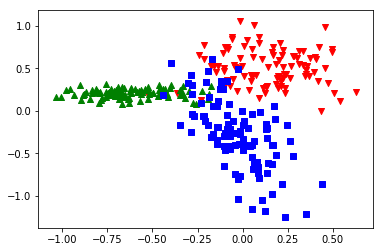

In [2]:
train_set, train_labels = load_data_classification("MGU_projekt1/Classification/data.three_gauss.train.100.csv", plot=True)
test_set, test_labels = load_data_classification("MGU_projekt1/Classification/data.three_gauss.test.100.csv")

# Na czysto

In [3]:
np.random.seed(1234)
nn = NeuralNetwork("cross_entropy", 0)

nn.add(Layer(20, 2, "sigmoid"))
nn.add(Layer(30, 20, "sigmoid"))
nn.add(Layer(3, 30, "softmax"))


In [4]:
train_loss1, test_loss1, _ = nn.train(
    train_set, one_hot_encode(train_labels, 3),
    test_set, one_hot_encode(test_labels, 3),
    epochs=80,
    learning_rate=1e-4
)

79

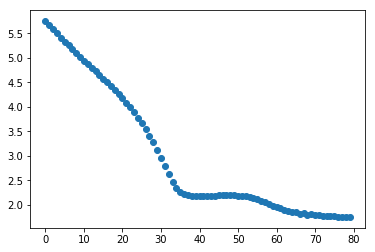

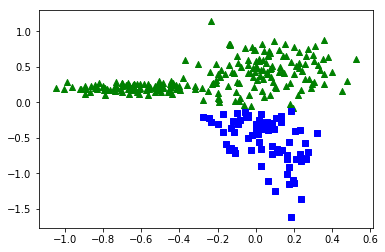

In [5]:
plot_results(nn, train_loss1, test_set)

In [6]:
train_loss2, test_loss2, _ = nn.train(
    train_set, one_hot_encode(train_labels, 3),
    test_set, one_hot_encode(test_labels, 3),
    epochs=80,
    learning_rate=1e-2
)

79

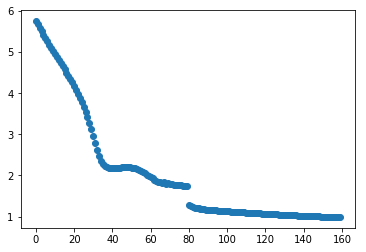

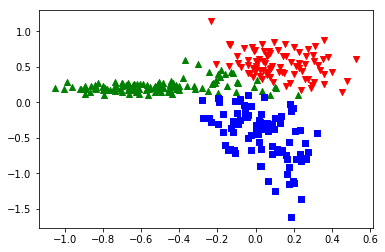

In [7]:
plot_results(nn, train_loss1+train_loss2, test_set)

In [14]:
def plot_decision_surface2(nn, X, n_samples = 50, proba=True, **kwargs):
    OX = np.linspace(X['x'].min(), X['x'].max(), n_samples)
    OY = np.linspace(X['x'].min(), X['y'].max(), n_samples)
    xx, yy = np.meshgrid(OX, OY)
    flat_x, flat_y = xx.flatten().tolist(), yy.flatten().tolist()
    z = np.zeros_like(flat_x)
    for i in range(len(flat_x)):
        z[i] = nn.forward_pass(np.array([[flat_x[i], flat_y[i]]])).argmax(axis=-1)
    if not proba:
        z = z > 0.5
    plt.contourf(xx,yy, z.reshape(xx.shape[0],xx.shape[1]),
    **kwargs)
    return z

array([2., 2., 2., ..., 0., 0., 0.])

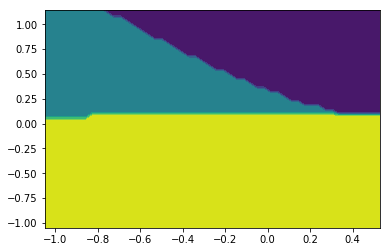

In [20]:
plot_decision_surface2(nn, pd.DataFrame(test_set).rename(columns={0: "x", 1: "y"}))#, colors=["red", "green", "blue"])

# Inny seed

In [8]:
np.random.seed(58)
nn2 = NeuralNetwork("cross_entropy", 0)

nn2.add(Layer(20, 2, "sigmoid"))
nn2.add(Layer(30, 20, "sigmoid"))
nn2.add(Layer(3, 30, "softmax"))

In [9]:
train_loss21, test_loss21, _ = nn2.train(
    train_set, one_hot_encode(train_labels, 3),
    test_set, one_hot_encode(test_labels, 3),
    epochs=80,
    learning_rate=1e-4
)

79

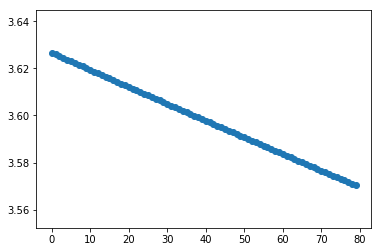

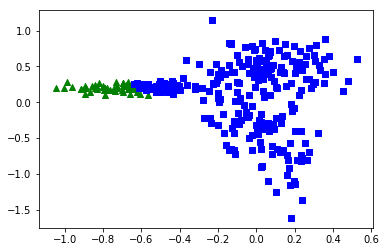

In [10]:
plot_results(nn2, train_loss21, test_set)

In [11]:
train_loss22, test_loss22, _ = nn2.train(
    train_set, one_hot_encode(train_labels, 3),
    test_set, one_hot_encode(test_labels, 3),
    epochs=100,
    learning_rate=1e-2
)

99

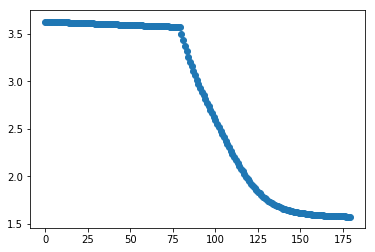

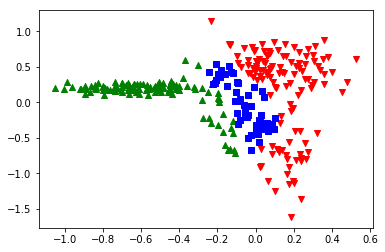

In [14]:
plot_results(nn2, train_loss21+train_loss22, test_set)

In [13]:
train_loss23, test_loss23, _ = nn2.train(
    train_set, one_hot_encode(train_labels, 3),
    test_set, one_hot_encode(test_labels, 3),
    epochs=100,
    learning_rate=1e-1
)

99

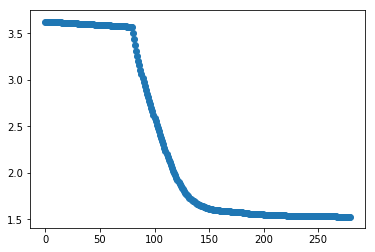

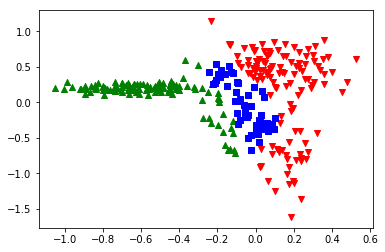

In [15]:
plot_results(nn2, train_loss21+train_loss22+train_loss23, test_set)

In [16]:
train_loss24, test_loss24, _ = nn2.train(
    train_set, one_hot_encode(train_labels, 3),
    test_set, one_hot_encode(test_labels, 3),
    epochs=100,
    learning_rate=1e-0
)

99

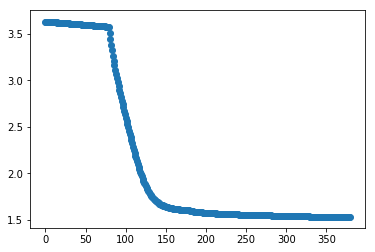

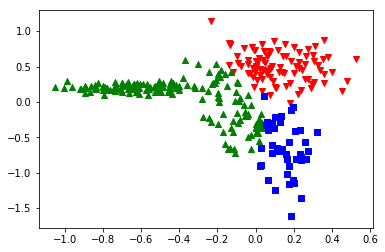

In [18]:
# plot_results(nn2, train_loss21+train_loss22+train_loss23+train_loss24, test_set)
plot_results(nn2, test_loss21+test_loss22+test_loss23+test_loss24, test_set)

# 1000 obs

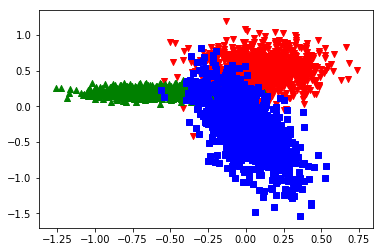

In [21]:
train_set1000, train_labels1000 = load_data_classification("MGU_projekt1/Classification/data.three_gauss.train.1000.csv", plot=True)
test_set1000, test_labels1000 = load_data_classification("MGU_projekt1/Classification/data.three_gauss.test.1000.csv")

In [28]:
np.random.seed(1234)
nn3 = NeuralNetwork("cross_entropy", 0)

nn3.add(Layer(20, 2, "sigmoid"))
nn3.add(Layer(30, 20, "sigmoid"))
nn3.add(Layer(3, 30, "softmax"))


In [29]:
train_loss11000, test_loss11000, _ = nn3.train(
    train_set1000, one_hot_encode(train_labels1000, 3),
    test_set1000, one_hot_encode(test_labels1000, 3),
    epochs=80,
    learning_rate=1e-4
)

79

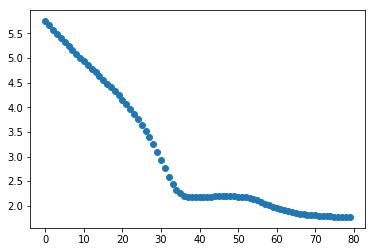

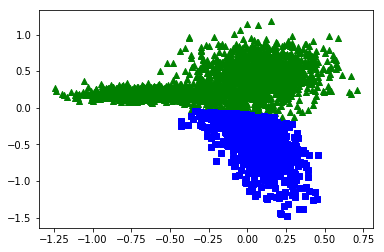

In [30]:
plot_results(nn3, train_loss11000, test_set1000)

In [31]:
train_loss21000, test_loss21000, _ = nn3.train(
    train_set1000, one_hot_encode(train_labels1000, 3),
    test_set1000, one_hot_encode(test_labels1000, 3),
    epochs=80,
    learning_rate=1e-2
)

79

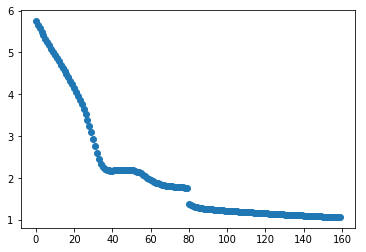

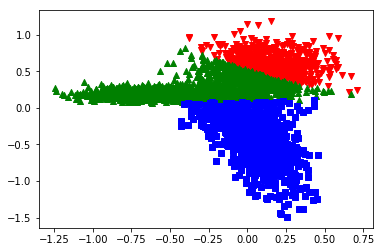

In [32]:
plot_results(nn3, train_loss11000+train_loss21000, test_set1000)